In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap

Создадим датасет для последующего использования

In [4]:
X, y = load_iris(return_X_y=True)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)

Функции, которые не будут меняться.

In [6]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [7]:
def e_metrics(x1, x2):
    
    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

In [8]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

**1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.**

В измененной функции написано два варианта определения весов в зависимости от номера (закомментировано) и в зависимости от дистанции.  
Изменения прокомментированы непосредственно в теле функции.

In [9]:
def knn_task_1(x_train, y_train, x_test, k):
    answers = []
    
    #---------------------------------------------------------
    # Вариант 1
    # применим лямбда функцию к списку для преобразования весов соседей в зависимости от номера соседа.
    q = 0.5
    #init = [_ for _ in range(k)]
    #weights = np.array(list(map(lambda x: (q ** x), init)))
    #---------------------------------------------------------    
    
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        #----------------------------------------------------------------------------------------
        # Отсортируем отдельно список и возьмем из него сразу k ближайших соседей.        
        sorted_distances = sorted(test_distances)[0:k]
        #------------------------------------------------------------------------------------------        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        #------------------------------------------------------------------------------------------------
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        # применяем корректировку при помощи веса к расстояниям.
        # Т.к. q задана ментше нуля, увеличение расстояния приводит к уменьшению веса.
        for d in sorted_distances:
            classes[d[1]] += 1*(q ** d[0])
        
        
        #for j in range(len(sorted_distances)):        
        # определение весов в зависимости от номера.  Веса посчитаны в начале функции.
        # И применение посчитанных весов к величине голоса.            
            #classes[sorted_distances[j][1]] += 1 * weights[j]                        
        #-------------------------------------------------------------------------------------------------
        
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

Проверка работы доработанной функции

In [10]:
k = 25

y_pred = knn_task_1(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 25: 0.933


В данном конкретном датасете точность достаточно слабо зависит от k.  
0,967 при 8  
0,933 при 25

**2. Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).**

Используем функции из методички

In [11]:
def kmeans_task_2(data, k, max_iterations, min_distance):
    # Создадим словарь для кластеризации
    clusters = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # кластеризуем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            cluster = distances.index(min(distances))
            clusters[cluster].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for cluster in clusters:
            centroids[cluster] = np.mean(clusters[cluster], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.linalg.norm(centroids[centroid] - old_centroids[centroid], ord=2) > min_distance:
                optimal = False
                break
        
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, clusters

In [67]:
def visualize(centroids, clusters):
    colors = ['r', 'g', 'b', 'orange', 'y']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for cluster_item in clusters:
        for x in clusters[cluster_item]:
            plt.scatter(x[0], x[1], color=colors[cluster_item])
            
    plt.show()

In [12]:
def cluster_metric(centoids, clusters):
    totals = []
    for i in range (len(centroids)):
        data_array = clusters[i]
        totals_i = 0
        for elem in data_array:
            totals_i += e_metrics(centroids[i], elem)
        totals.append(totals_i)
    return sum(totals)

In [41]:
# определим максимальное количество итераций
max_iterations = 1

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 3

Сгенерируем датасет для проверки.

In [192]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, random_state=12)

Внешний вид датасета

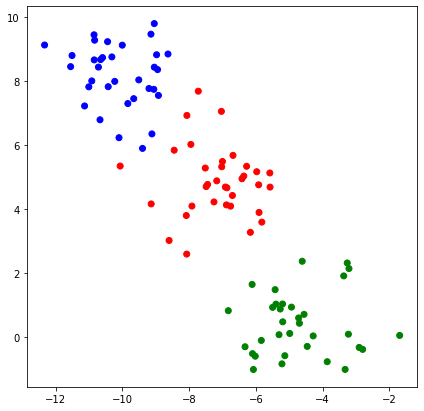

In [193]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

Кластеризация

In [194]:
%%time
centroids, clusters = kmeans_task_2(X, k, max_iterations, min_distance)

Wall time: 29 ms


Запуск функции в цикле.

In [195]:
clusters_score = []
for i in range(1, 15):
    centroids, clusters = kmeans_task_2(X, i, max_iterations, min_distance)
    value = cluster_metric(centroids, clusters)
    clusters_score.append([i, value])

In [196]:
clusters_score = np.array(clusters_score)
clusters_score

array([[  1.        , 449.62086804],
       [  2.        , 393.02848672],
       [  3.        , 197.48419208],
       [  4.        , 179.32247068],
       [  5.        , 127.99703879],
       [  6.        , 125.20628174],
       [  7.        , 123.78900247],
       [  8.        , 119.67891214],
       [  9.        , 110.9344009 ],
       [ 10.        , 104.25094161],
       [ 11.        ,  94.21501394],
       [ 12.        ,  92.94106389],
       [ 13.        ,  81.17934631],
       [ 14.        ,  77.53448901]])

Построение графика 

<function matplotlib.pyplot.show(close=None, block=None)>

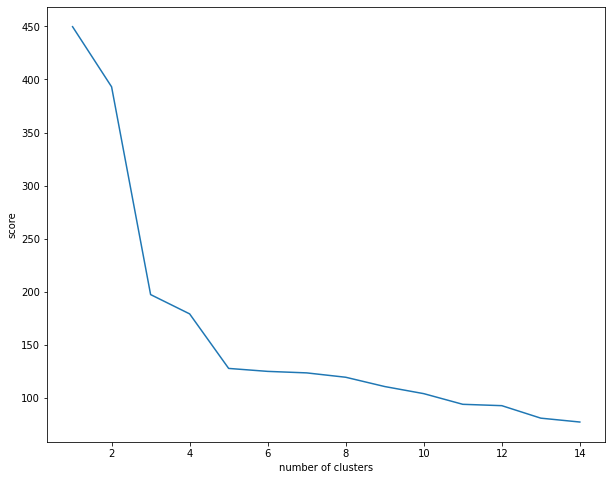

In [197]:
plt.figure(figsize=(10,8))
plt.plot(clusters_score[:, 0], clusters_score[:, 1])
plt.ylabel("score")
plt.xlabel("number of clusters")
plt.show

График имеет несколько изломов.  
Наиболее сильные изломы соответствуют количеству кластеров = 3 и 5  
Надо отметить, что положение изломов зависит, как от распределния точек, так и от количества объектов в выборке.

**3. Оптимизировать код для KNN (оставить один цикл, либо обойтись без циклов вообще).**

Отдельная функция для выполнения предсказания.  
См комментарии в коде.

In [183]:
def predict(inputs, labels, test, k):
    """Функция выполняющая предсказание и возвращающая значение величины класса по 
    максимальному количеству голосов за класс"""
    # Вычисление дистанции для кажого из переданных инзутов
    inputs['dist'] = np.linalg.norm(inputs.values-test.values, axis=1)
    # Объединение ввода и проверочных значений для сохранения порядка после сортировки.
    inputs = pd.concat([inputs, labels], axis=1)
    # Сортиовка по дистанции вместе со значениями класса     
    inputs = inputs.sort_values('dist', ascending=True)
    # Выбраны только k значений в топе.
    neighbors = inputs.head(k)
    # взвращаются значения классов для выбранных соседей
    classes = neighbors['class'].tolist()
    # Используя тсндартную питоновскую библиотеку берем значение соответствующее
    # максимальному количеству голосов
    majority_count = Counter(classes)
    voted = majority_count.most_common(1).pop()[0]    
    return voted

In [184]:
def knn_task_3(X_train, y_train, X_test, k):
    """Базовая функция для работы по алгоритму knn"""
    # Обхявляем бащовый массив с ответами
    answers = np.zeros(X_test.shape[0])    
    X_test.reset_index(drop=True, inplace=True)
    # перебираем тестовый датафрэйм и для каждого X возвращаем
    # предсказанное значение класса на основании переданной 
    # тренировочной выборки
    for index, row in X_test.iterrows():
        answers[index] = predict(X_train.copy(), y_train.copy(), row, k)        
    return answers

Преобразовываем numpy массив в pandas dataframe, т.к. с ним легче работать.

In [185]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_df = pd.DataFrame(y_train, columns=['class'])
y_test_df = pd.DataFrame(y_test, columns=['class'])

Проверка работы доработанной функции на примере датасета из задачи 1.

In [186]:
from collections import Counter

In [187]:
k = 25

In [188]:
%time
y_pred = knn_task_3(X_train_df, y_train_df, X_test_df, k)

Wall time: 0 ns


In [189]:
%time
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Wall time: 0 ns
Точность алгоритма при k = 25: 0.933
